In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\2268519\AppData\Local\Temp\ipykernel_15620\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('1553768847-housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


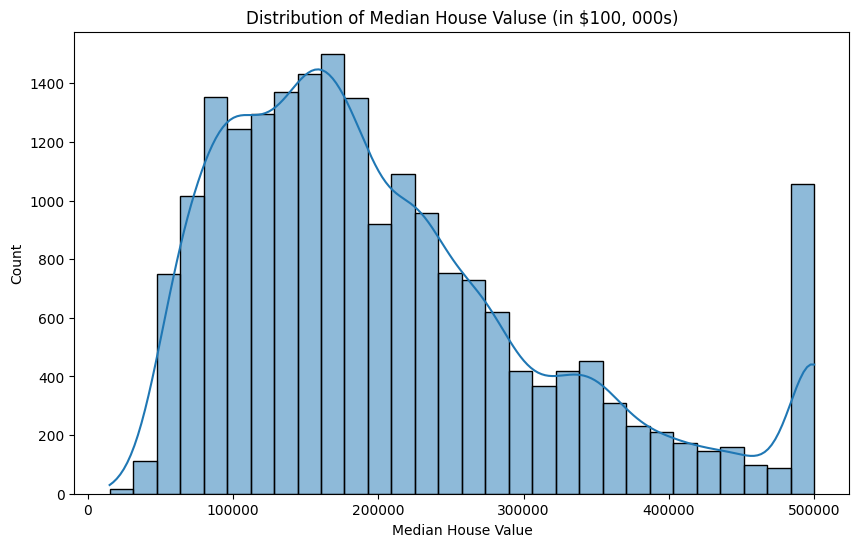

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['median_house_value'], kde = True, bins=30)
plt.title('Distribution of Median House Valuse (in $100, 000s)')
plt.xlabel('Median House Value')
plt.show()


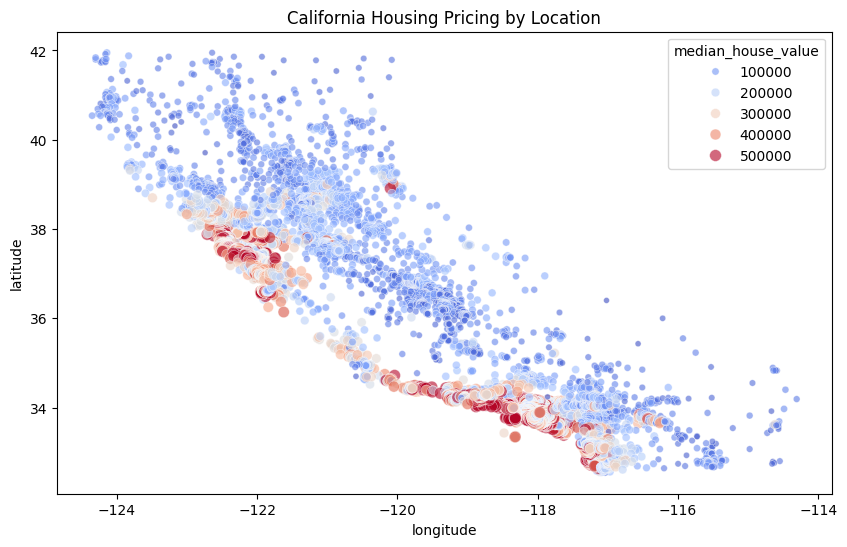

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', size = 'median_house_value', hue='median_house_value', palette = 'coolwarm', alpha=0.6)
plt.title('California Housing Pricing by Location')
plt.show()

In [7]:
df.isna().sum().sort_values()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
total_bedrooms        207
dtype: int64

In [9]:
median_bedrooms = df['total_bedrooms'].median()

In [10]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)

In [11]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [12]:
df_model = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [13]:
df.shape

(20640, 10)

In [23]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [16]:
X = df_model.drop(columns = ['median_house_value'])
y = df_model['median_house_value']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
numeric_feturing = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [25]:
scaler = StandardScaler()

In [26]:
X_train[numeric_feturing] = scaler.fit_transform(X_train[numeric_feturing])
X_test[numeric_feturing] = scaler.transform(X_test[numeric_feturing])

In [27]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,False,False,False,True
8267,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,False,False,False,True
17445,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,False,False,False,True
14265,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,False,False,False,True
2271,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,True,False,False,False


In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [29]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [31]:
rsme_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rsme_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [32]:
print(f"Linear Regression RMSE (in dollors): ${rsme_lr: ,.2f}")
print(f"Random Forest RMSE (in dollors): ${rsme_rf: ,.2f}")

Linear Regression RMSE (in dollors): $ 70,060.52
Random Forest RMSE (in dollors): $ 48,812.41


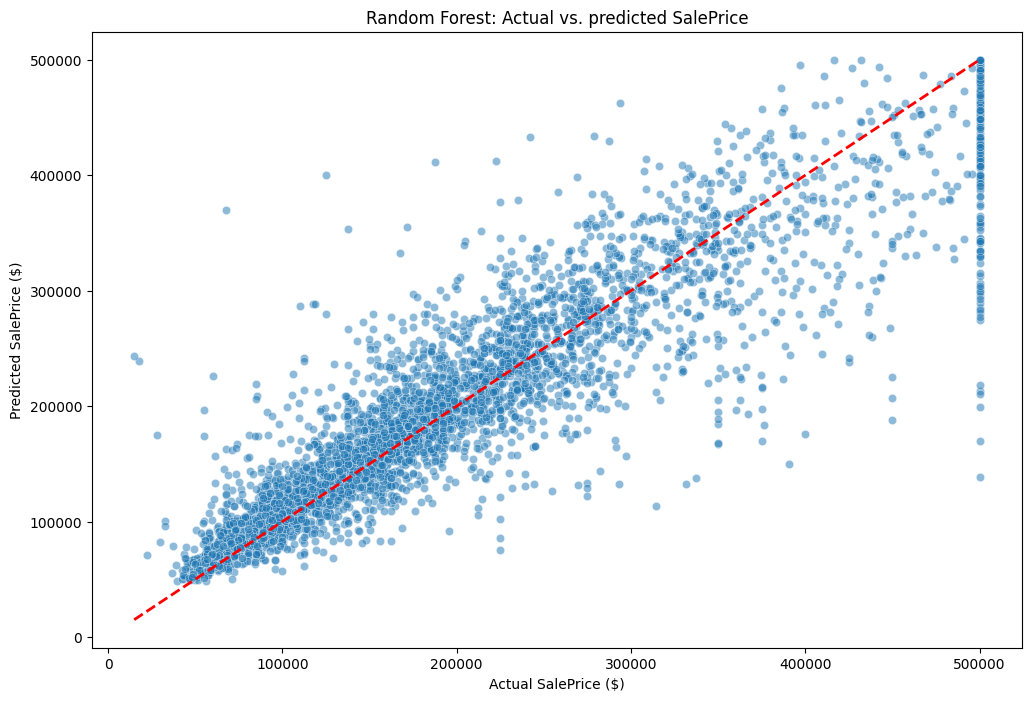

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_test, y =y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Actual vs. predicted SalePrice')
plt.xlabel('Actual SalePrice ($)')
plt.ylabel('Predicted SalePrice ($)')
plt.show()